CODE BLOCK: 1

<!--
>**This is Bold**
>>*This is Italics*
>>>- Simple statement
>>> - `string`
>>>> - $ mathematical symbols $
>>>> 1. Number 1
>>>> 2. Number 2


&#x25BA;


*** -->

# Session 5 - Assignment - Modular and Better Commented Code

# First CNN Network for MNIST

## Modular Code
- Divide the code into 3 main files
    - model.py: *This file holds the model related details*
    - utils.py: *This file holds the utility functions that might be commonly required*
    - S5.ipynb: *Main Notebook file that has the variables, configuration parameters and actual calls
    
<a id="section-1">section-1</a>

### [1. Import appropriate modules required in this file](#section-1)
- import model: importing the code written in model.py that is kept in path of current working directory
- import utils: Similarly importing code in utils.py

In [1]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchsummary import summary

import model
import utils

CODE BLOCK: 2

### [2. Check if GPU (CUDA) or CPU](#section-2)
- Cuda availablbility check to ensure using GPU if available for the network
- Taking the value into device variable if cuda (GPU) or only CPU

In [2]:
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


CODE BLOCK: 3

### [3. Data transforms for training and testing](#section-3)
- Transforms specific to the training and testing
- Training to include different transformations for the model to learn
- Testing not to have the same to ensure validation is on normal set

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-20., 20.), fill=0),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.RandomAffine(5),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

### [4. Getting the MNIST train and test dataset from torchvision datasets library](#section-4)
- Already separated datasets for train and test
- train with *??* records and test with *10000* records
- Marking train as True of False decides the train vs test data sets
- The transforms are being loaded from utils file
- transforms being done on train but not on test

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

### [5. Data loader setup for Training and Testing](#section-5)
- Batch size definition - Keeping separate for Training and Testing
- Training lower for better training and Testing higher for faster validation
- Data loader definition

In [5]:
train_batch_size = 512
test_batch_size = 2048

In [6]:
# train_args = {'batch_size': train_batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
# test_args = {'batch_size': test_batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
kwargs = {'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, batch_size=train_batch_size, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=test_batch_size, **kwargs)

CODE BLOCK: 6

### [6. Data Visualization](#section-6)
- Visualization of data to understand the images and corresponding labels
- Also gives an understanding of the dataloader like Shuffle, etc.

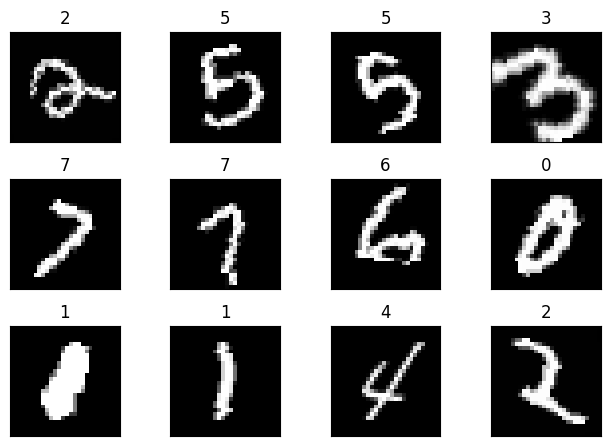

In [8]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  # print(batch_data[i].squeeze(0).shape)
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

### [7. Model training](#section-7)
- Loading the model on the right device - CUDA or CPU
- Setting up the right parameters like epochs, optimizer and scheduler for the training
- Running the training and validating the output against Test dataset
- While doing that also storing the loss and accuracy results for each epoch for understanding

In [9]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_accs = []
test_accs = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [10]:
mymodel = model.Net6().to(device)

summary(mymodel, input_size=(1, 28, 28))

optimizer = optim.SGD(mymodel.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_loss = utils.train(mymodel, device, train_loader, optimizer, criterion)
  test_acc, test_loss = utils.test(mymodel, device, test_loader, criterion)
  train_accs.append(train_acc)
  train_losses.append(train_loss)
  test_accs.append(test_acc)
  test_losses.append(test_loss)
  scheduler.step()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
       BatchNorm2d-2            [-1, 4, 26, 26]               8
            Conv2d-3            [-1, 8, 24, 24]             296
       BatchNorm2d-4            [-1, 8, 24, 24]              16
         MaxPool2d-5            [-1, 8, 12, 12]               0
            Conv2d-6           [-1, 24, 10, 10]           1,752
       BatchNorm2d-7           [-1, 24, 10, 10]              48
           Dropout-8           [-1, 24, 10, 10]               0
            Conv2d-9             [-1, 48, 8, 8]          10,416
      BatchNorm2d-10             [-1, 48, 8, 8]              96
        MaxPool2d-11             [-1, 48, 4, 4]               0
           Conv2d-12             [-1, 10, 2, 2]           4,330
      BatchNorm2d-13             [-1, 10, 2, 2]              20
          Dropout-14             [-1, 1

Train: Loss=0.4718 Batch_id=117 Accuracy=82.35: 100%|██████████| 118/118 [00:40<00:00,  2.89it/s]


Test set: Average loss: 0.1729, Accuracy: 9732/10000 (97.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.3542 Batch_id=117 Accuracy=93.69: 100%|██████████| 118/118 [00:41<00:00,  2.82it/s]


Test set: Average loss: 0.0984, Accuracy: 9802/10000 (98.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1567 Batch_id=117 Accuracy=94.85: 100%|██████████| 118/118 [00:41<00:00,  2.86it/s]


Test set: Average loss: 0.0669, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2182 Batch_id=117 Accuracy=95.63: 100%|██████████| 118/118 [00:42<00:00,  2.80it/s]


Test set: Average loss: 0.0524, Accuracy: 9872/10000 (98.72%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1541 Batch_id=117 Accuracy=96.09: 100%|██████████| 118/118 [00:41<00:00,  2.86it/s]


Test set: Average loss: 0.0507, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.3018 Batch_id=117 Accuracy=96.40: 100%|██████████| 118/118 [00:41<00:00,  2.84it/s]


Test set: Average loss: 0.0420, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1068 Batch_id=117 Accuracy=96.57: 100%|██████████| 118/118 [00:42<00:00,  2.78it/s]


Test set: Average loss: 0.0386, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0999 Batch_id=117 Accuracy=96.78: 100%|██████████| 118/118 [00:42<00:00,  2.76it/s]


Test set: Average loss: 0.0321, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1234 Batch_id=117 Accuracy=97.03: 100%|██████████| 118/118 [00:39<00:00,  2.97it/s]


Test set: Average loss: 0.0295, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1592 Batch_id=117 Accuracy=96.98: 100%|██████████| 118/118 [00:39<00:00,  3.00it/s]


Test set: Average loss: 0.0334, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1401 Batch_id=117 Accuracy=97.17: 100%|██████████| 118/118 [00:40<00:00,  2.94it/s]


Test set: Average loss: 0.0276, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1424 Batch_id=117 Accuracy=97.31: 100%|██████████| 118/118 [00:39<00:00,  3.00it/s]


Test set: Average loss: 0.0285, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.1765 Batch_id=117 Accuracy=97.29: 100%|██████████| 118/118 [00:40<00:00,  2.94it/s]


Test set: Average loss: 0.0227, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0794 Batch_id=117 Accuracy=97.44: 100%|██████████| 118/118 [00:40<00:00,  2.88it/s]


Test set: Average loss: 0.0251, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.1370 Batch_id=117 Accuracy=97.44: 100%|██████████| 118/118 [00:39<00:00,  2.98it/s]


Test set: Average loss: 0.0291, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.1392 Batch_id=117 Accuracy=97.69: 100%|██████████| 118/118 [00:40<00:00,  2.90it/s]


Test set: Average loss: 0.0219, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.1451 Batch_id=117 Accuracy=97.75: 100%|██████████| 118/118 [00:40<00:00,  2.92it/s]


Test set: Average loss: 0.0222, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0522 Batch_id=117 Accuracy=97.71: 100%|██████████| 118/118 [00:39<00:00,  2.96it/s]


Test set: Average loss: 0.0219, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0953 Batch_id=117 Accuracy=97.73: 100%|██████████| 118/118 [00:39<00:00,  2.98it/s]


Test set: Average loss: 0.0218, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.2251 Batch_id=117 Accuracy=97.75: 100%|██████████| 118/118 [00:40<00:00,  2.95it/s]


Test set: Average loss: 0.0214, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

### [8. Model Accuracy and Loss plots visualization](#section-8)
- Part of utils
- Drawing plots of Training and Testing accuracy and loss
- This gives us an understanding of how the accuracy and losses improved over epochs
- Also helps to understand where we should have stopped the training for optimum results

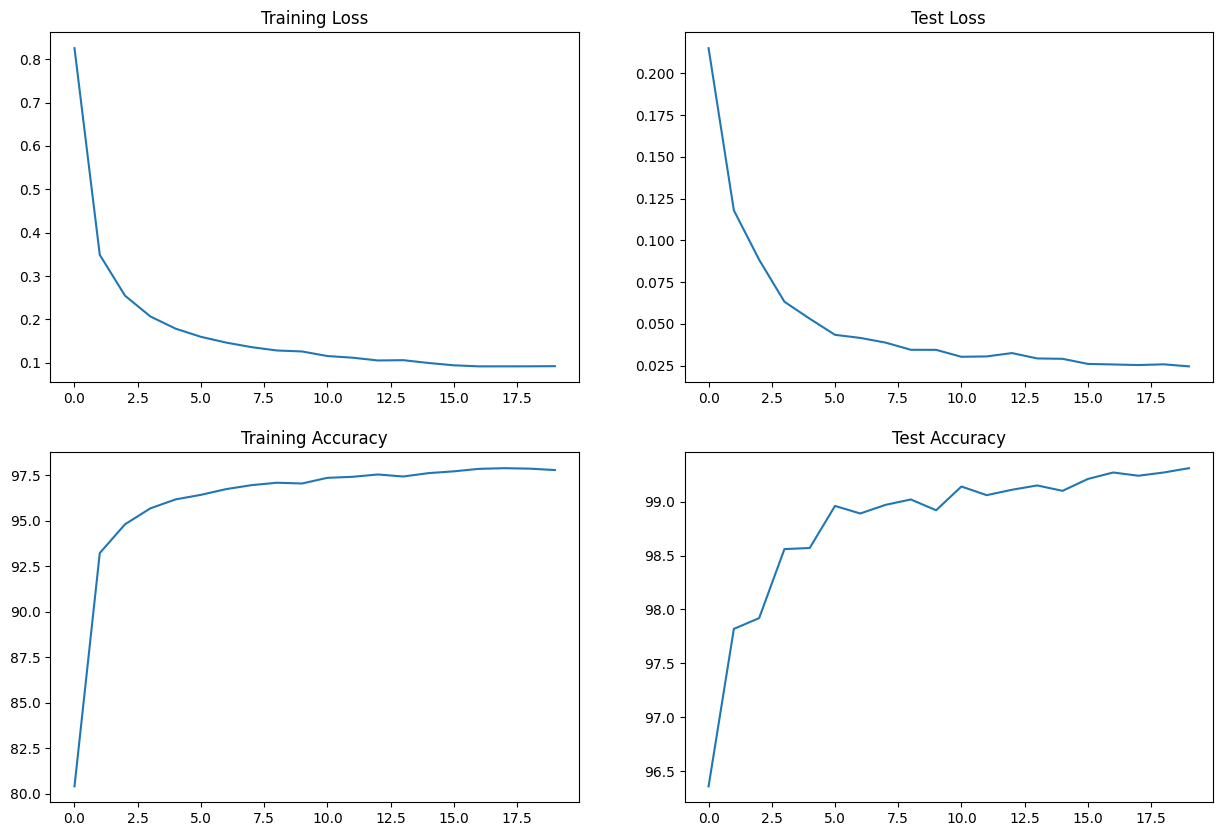

In [10]:
utils.drawLossAccuracyPlots(train_losses, train_accs, test_losses, test_accs)